# X90 Optimiser

This notebook is purely for the purpose of optimising the X90 pulse for a given transmon.

In [1]:
# imports
import numpy as np
from qutip import basis
from transmon_code.transmon import *
from transmon_code.optimise_X90 import *
from transmon_code.simulate import *

In [2]:
# define the transmon

tr = Transmon(n_levels=8, initial_state=0, Ω=2*np.pi*3981, α=2*np.pi*-199)

# for a pulse of length 0.024
tr.X90_args = {'A': 0.9821623327698041, 'τ': 0.024, 'λ': 0, 'α': tr.α, 'ω': tr.Ω, 'δ':-5.070445236848315}

Optimising A
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 


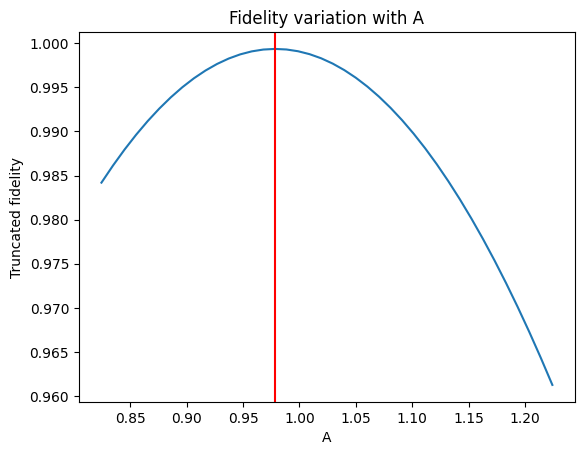

Keeping λ constant.
Optimising δ
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 


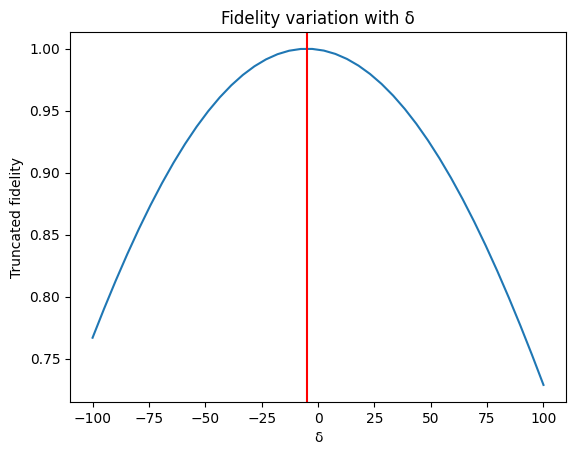

Optimal args:{'A': 0.9784653274996159, 'τ': 0.024, 'λ': 0, 'α': -1250.3538761287377, 'ω': 25013.360707881933, 'δ': -4.991151665652778}
Optimising A
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 


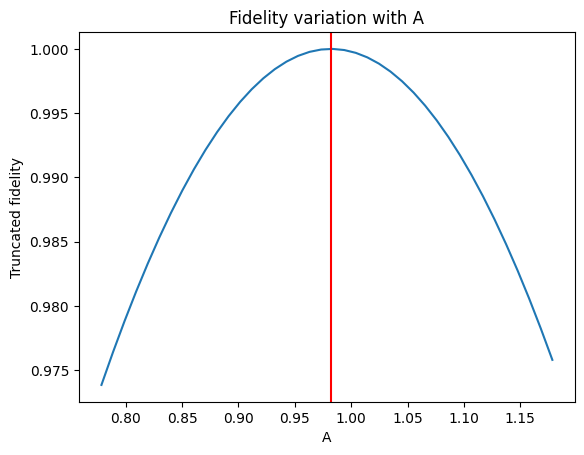

Keeping λ constant.
Optimising δ
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 


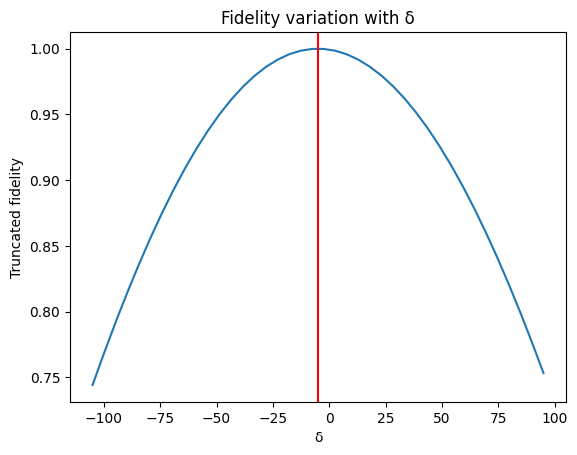

Optimal args:{'A': 0.9820975565072274, 'τ': 0.024, 'λ': 0, 'α': -1250.3538761287377, 'ω': 25013.360707881933, 'δ': -5.069002178670322}
Optimising A
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 


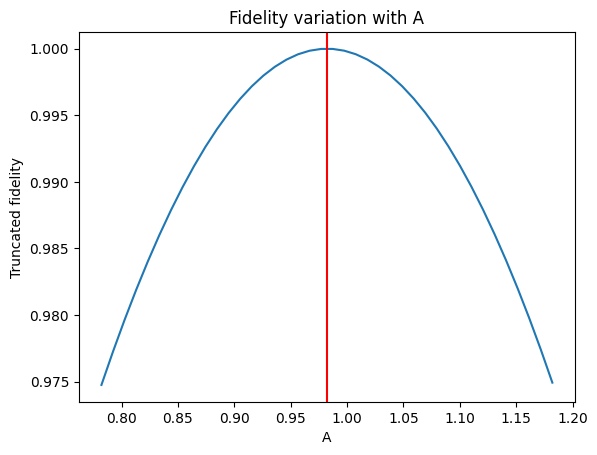

Keeping λ constant.
Optimising δ
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 


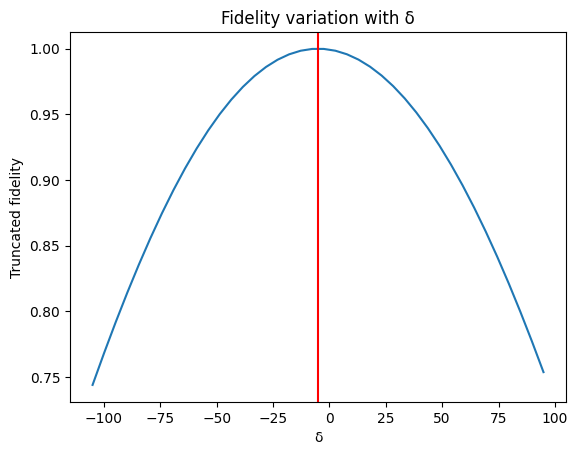

Optimal args:{'A': 0.9821623327698041, 'τ': 0.024, 'λ': 0, 'α': -1250.3538761287377, 'ω': 25013.360707881933, 'δ': -5.070445236848315}


In [3]:
# optimise the pulse

semiranges = {"A":0.2 , "λ":0, "δ":100}

for i in range(3):
    tr.X90_args = create_X90_pulse(tr, tr.X90_args, semiranges, plot=True, rand_init=False, N=40)

Fidelity (f):                0.4984753049548809
Measured error (1-f):        0.5015246950451191

Leakage error:               0.0046038255223430705
Theoretical coherence error: 0.0
Error accounted for:         0.0046038255223430705

Error unaccounted for:       0.49692086952277603


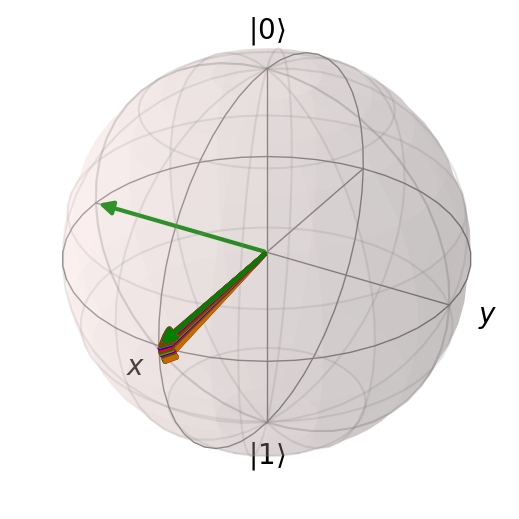

Fidelity (f):                0.4984753049548809
Measured error (1-f):        0.5015246950451191

Leakage error:               0.0046038255223430705
Theoretical coherence error: 0.0
Error accounted for:         0.0046038255223430705

Error unaccounted for:       0.49692086952277603


In [5]:
# check result
%matplotlib qt

tr.ψ0 = (basis(8,0)+1*basis(8,1)).unit()

# test from 0 to - (minus)
targ = (basis(tr.n_levels, 0)-1j*basis(tr.n_levels, 1)).unit()

# tr.X90_args = {'A': 0.9663291132851726, 'τ': 0.024, 'λ': 5.745471397741902, 'α': tr.α, 'ω': tr.Ω, 'δ':-6.198612051708744}

res, f = simulate(tr, tr.X90_args, target=targ, noise=False, plot=True)

break_down_errors(tr, tr.X90_args["τ"], res[-1], f)